In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\spam.csv', encoding='ISO-8859-1')


In [3]:
df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [4]:
df.shape

(5572, 5)

# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

v1                                                 v2
1329   ham  I dont know what to do to come out of this so ...
1508   ham  Sounds like something that someone testing me ...
5141  spam  FREE for 1st week! No1 Nokia tone 4 ur mobile ...
5477   ham  What Today-sunday..sunday is holiday..so no wo...
3176   ham                     In meeting da. I will call you

In [8]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

target                                               text
2076    ham          Trust me. Even if isn't there, its there.
481     ham  Yo carlos, a few friends are already asking me...
2584    ham            Hi happy birthday. Hi hi hi hi hi hi hi
563    spam  GENT! We are trying to contact you. Last weeke...
1765    ham  Hi this is yijue... It's regarding the 3230 te...

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()

403

In [14]:
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

# EDA 

In [17]:
df.head()

target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

In [18]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

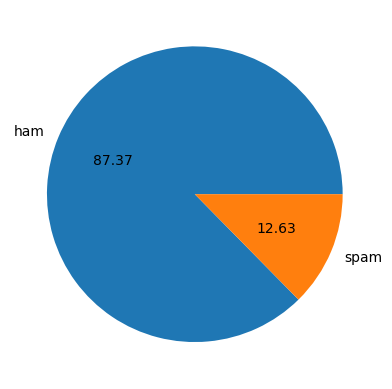

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [76]:
import nltk
import os

alternative_mirror_url = "https://example.com/nltk_data/"

os.environ["NLTK_DATA"] = alternative_mirror_url

nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\U.S\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [77]:
df['num_characters'] = df['text'].apply(len)

In [27]:
df.head()

target                                               text  num_characters
0       0  Go until jurong point, crazy.. Available only ...             111
1       0                      Ok lar... Joking wif u oni...              29
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155
3       0  U dun say so early hor... U c already then say...              49
4       0  Nah I don't think he goes to usf, he lives aro...              61

In [28]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  
0         24  
1          8  
2         37  
3         13  
4         15

In [30]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences  
0         24              2  
1          8              2  
2         37              2  
3         13              1  
4         15              1

In [32]:
df[['num_characters','num_words','num_sentences']].describe()

num_characters    num_words  num_sentences
count     5169.000000  5169.000000    5169.000000
mean        78.977945    18.453279       1.947185
std         58.236293    13.324793       1.362406
min          2.000000     1.000000       1.000000
25%         36.000000     9.000000       1.000000
50%         60.000000    15.000000       1.000000
75%        117.000000    26.000000       2.000000
max        910.000000   220.000000      28.000000

In [33]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()


num_characters    num_words  num_sentences
count     4516.000000  4516.000000    4516.000000
mean        70.459256    17.120903       1.799601
std         56.358207    13.493725       1.278465
min          2.000000     1.000000       1.000000
25%         34.000000     8.000000       1.000000
50%         52.000000    13.000000       1.000000
75%         90.000000    22.000000       2.000000
max        910.000000   220.000000      28.000000

In [34]:

df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

num_characters   num_words  num_sentences
count      653.000000  653.000000     653.000000
mean       137.891271   27.667688       2.967841
std         30.137753    7.008418       1.483201
min         13.000000    2.000000       1.000000
25%        132.000000   25.000000       2.000000
50%        149.000000   29.000000       3.000000
75%        157.000000   32.000000       4.000000
max        224.000000   46.000000       8.000000

In [35]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

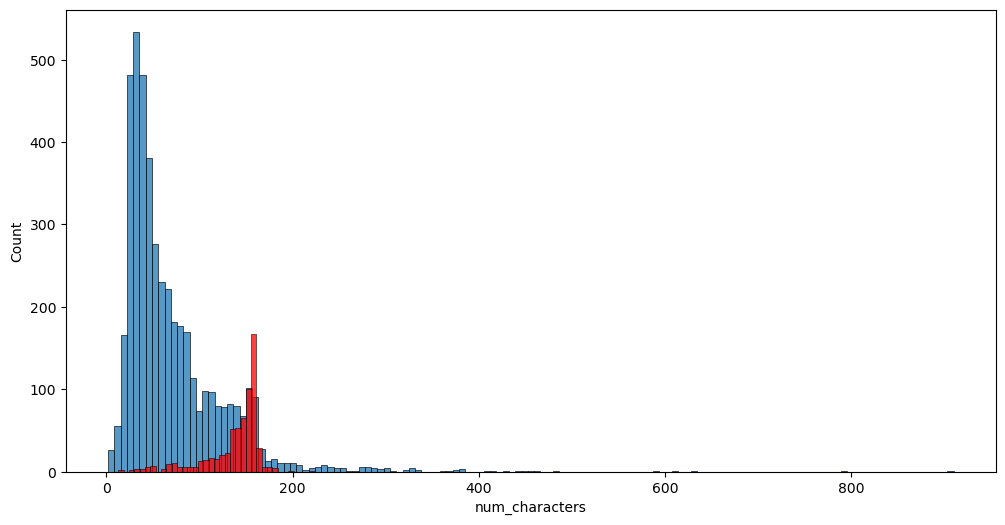

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

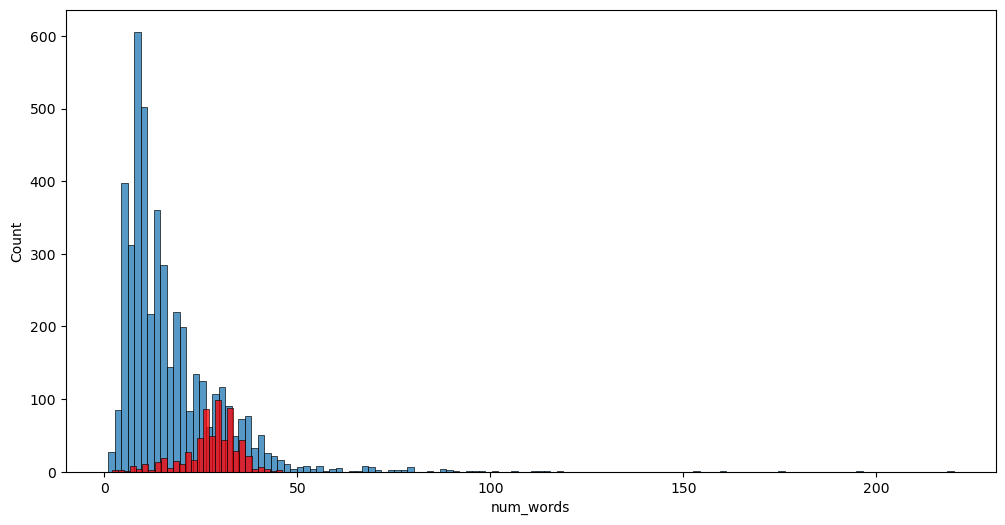

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

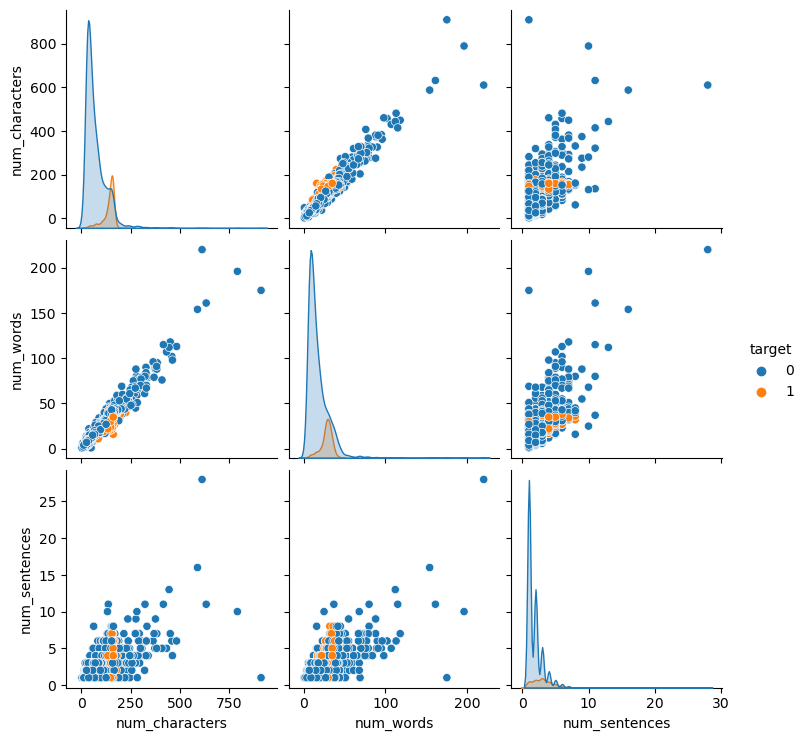

In [38]:
sns.pairplot(df,hue='target')

C:\Users\U.S\AppData\Local\Temp\ipykernel_1228\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

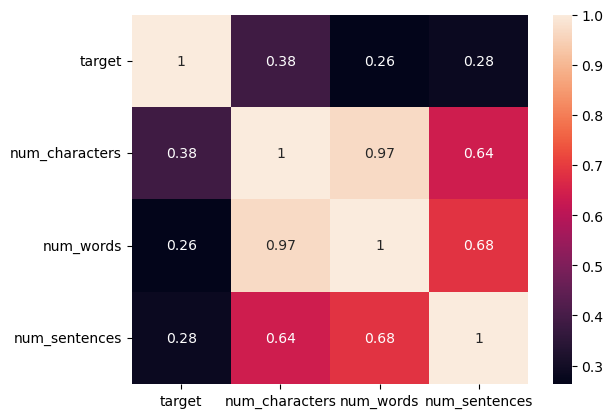

In [39]:
sns.heatmap(df.corr(),annot=True)

# Data PreProcessing

Lower Case
Tokenization
Removing special characters
Removing stop words and punctuation
Stemming

In [40]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [41]:
!pip install nltk

In [42]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [43]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [44]:
!pip install nltk

In [45]:
import nltk
nltk.data.path.append("C:\\Users\\U.S\\AppData\\Roaming\\nltk_data\\corpora\\stopwords")


In [46]:
from nltk.corpus import stopwords
import string

def transform_text(text):
    stop_words = set(stopwords.words('english'))
    punctuation_set = set(string.punctuation)


    y = [i for i in text if i not in stop_words and i not in punctuation_set]
    
    return y

df['transformed_text'] = df['text'].apply(transform_text)
df.head()


target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences                                   transformed_text  
0         24              2  [G,  , u, n, l,  , j, u, r, n, g,  , p, n,  , ...  
1          8              2  [O, k,  , l, r,  , J, k, n, g,  , w, f,  , u, ...  
2         37              2  [F, r, e, e,  , e, n, r,  , n,  , 2,  ,  , w, ...  
3         13              1  [U,  , u, n,  ,  ,  , e, r, l,  , h, r,  , U, ...  
4         15              1  [N, h,  , I,  , n,  , h, n, k,  , h, e,  , g, ...

In [47]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [48]:
df['transformed_text'] = df['transformed_text'].astype(str)


In [49]:
df['transformed_text'] = df['transformed_text'].fillna('')


In [50]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))


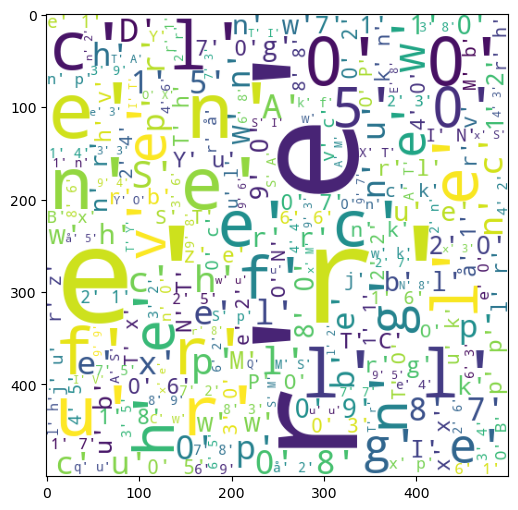

In [51]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [52]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

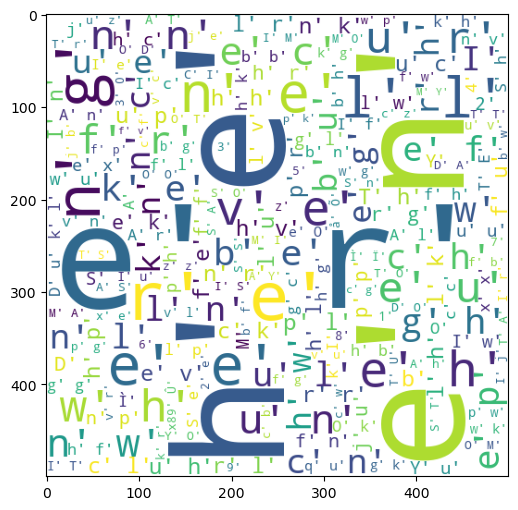

In [53]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [54]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences                                   transformed_text  
0         24              2  ['G', ' ', 'u', 'n', 'l', ' ', 'j', 'u', 'r', ...  
1          8              2  ['O', 'k', ' ', 'l', 'r', ' ', 'J', 'k', 'n', ...  
2         37              2  ['F', 'r', 'e', 'e', ' ', 'e', 'n', 'r', ' ', ...  
3         13              1  ['U', ' ', 'u', 'n', ' ', ' ', ' ', 'e', 'r', ...  
4         15              1  ['N', 'h', ' ', 'I', ' ', 'n', ' ', 'h', 'n', ...

In [55]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences                                   transformed_text  
0         24              2  ['G', ' ', 'u', 'n', 'l', ' ', 'j', 'u', 'r', ...  
1          8              2  ['O', 'k', ' ', 'l', 'r', ' ', 'J', 'k', 'n', ...  
2         37              2  ['F', 'r', 'e', 'e', ' ', 'e', 'n', 'r', ' ', ...  
3         13              1  ['U', ' ', 'u', 'n', ' ', ' ', ' ', 'e', 'r', ...  
4         15              1  ['N', 'h', ' ', 'I', ' ', 'n', ' ', 'h', 'n', ...

In [56]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [57]:
len(spam_corpus)

77758

In [58]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences                                   transformed_text  
0         24              2  ['G', ' ', 'u', 'n', 'l', ' ', 'j', 'u', 'r', ...  
1          8              2  ['O', 'k', ' ', 'l', 'r', ' ', 'J', 'k', 'n', ...  
2         37              2  ['F', 'r', 'e', 'e', ' ', 'e', 'n', 'r', ' ', ...  
3         13              1  ['U', ' ', 'u', 'n', ' ', ' ', ' ', 'e', 'r', ...  
4         15              1  ['N', 'h', ' ', 'I', ' ', 'n', ' ', 'h', 'n', ...

# Model Building

In [59]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [60]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [61]:
X.shape

(5169, 3)

In [62]:
y = df['target'].values

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [65]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [66]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [67]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.14313346228239845
[[ 10 886]
 [  0 138]]
0.134765625


In [68]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.8665377176015474
[[896   0]
 [138   0]]
0.0


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8665377176015474
[[896   0]
 [138   0]]
0.0


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
!pip install xgboost

     -------------------------------------- 99.8/99.8 MB 469.6 kB/s eta 0:00:00


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [72]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [73]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [74]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [78]:
train_classifier(svc,X_train,y_train,X_test,y_test)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8665377176015474, 0.0)

In [79]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision 

For  SVC
Accuracy -  0.8665377176015474
Precision -  0.0
For  KN
Accuracy -  0.8665377176015474
Precision -  0.0
For  NB
Accuracy -  0.8665377176015474
Precision -  0.0
For  DT
Accuracy -  0.8665377176015474
Precision -  0.0
For  LR
Accuracy -  0.8665377176015474
Precision -  0.0


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  RF
Accuracy -  0.8665377176015474
Precision -  0.0


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  AdaBoost
Accuracy -  0.8665377176015474
Precision -  0.0


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  BgC
Accuracy -  0.8665377176015474
Precision -  0.0
For  ETC
Accuracy -  0.8665377176015474
Precision -  0.0
For  GBDT
Accuracy -  0.8665377176015474
Precision -  0.0
For  xgb
Accuracy -  0.8665377176015474
Precision -  0.0


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision', ascending=True)

In [82]:
performance_df

Algorithm  Accuracy  Precision
0        SVC  0.866538        0.0
1         KN  0.866538        0.0
2         NB  0.866538        0.0
3         DT  0.866538        0.0
4         LR  0.866538        0.0
5         RF  0.866538        0.0
6   AdaBoost  0.866538        0.0
7        BgC  0.866538        0.0
8        ETC  0.866538        0.0
9       GBDT  0.866538        0.0
10       xgb  0.866538        0.0

In [83]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [84]:
performance_df1 

Algorithm   variable     value
0        SVC   Accuracy  0.866538
1         KN   Accuracy  0.866538
2         NB   Accuracy  0.866538
3         DT   Accuracy  0.866538
4         LR   Accuracy  0.866538
5         RF   Accuracy  0.866538
6   AdaBoost   Accuracy  0.866538
7        BgC   Accuracy  0.866538
8        ETC   Accuracy  0.866538
9       GBDT   Accuracy  0.866538
10       xgb   Accuracy  0.866538
11       SVC  Precision  0.000000
12        KN  Precision  0.000000
13        NB  Precision  0.000000
14        DT  Precision  0.000000
15        LR  Precision  0.000000
16        RF  Precision  0.000000
17  AdaBoost  Precision  0.000000
18       BgC  Precision  0.000000
19       ETC  Precision  0.000000
20      GBDT  Precision  0.000000
21       xgb  Precision  0.000000

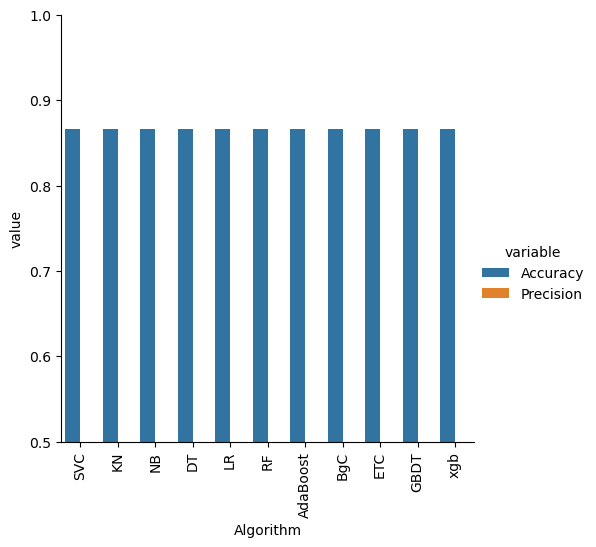

In [85]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [86]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})

In [89]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values(by='Precision_scaling', ascending=True)

In [90]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [92]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values(by='Precision_num_chars', ascending=True)

In [93]:
new_df_scaled.merge(temp_df,on='Algorithm')

Algorithm  Accuracy  Precision  Accuracy_scaling_x  Precision_scaling_x  \
0        SVC  0.866538        0.0            0.866538                  0.0   
1         KN  0.866538        0.0            0.866538                  0.0   
2         NB  0.866538        0.0            0.866538                  0.0   
3         DT  0.866538        0.0            0.866538                  0.0   
4         LR  0.866538        0.0            0.866538                  0.0   
5         RF  0.866538        0.0            0.866538                  0.0   
6   AdaBoost  0.866538        0.0            0.866538                  0.0   
7        BgC  0.866538        0.0            0.866538                  0.0   
8        ETC  0.866538        0.0            0.866538                  0.0   
9       GBDT  0.866538        0.0            0.866538                  0.0   
10       xgb  0.866538        0.0            0.866538                  0.0   

    Accuracy_scaling_y  Precision_scaling_y  Accuracy_num_chars  \
0             0.866538                  0.0            0.866538   
1             0.866538                  0.0            0.866538   
2             0.866538                  0.0            0.866538   
3             0.866538                  0.0            0.866538   
4             0.866538                  0.0            0.866538   
5             0.866538                  0.0            0.866538   
6             0.866538                  0.0            0.866538   
7             0.866538                  0.0            0.866538   
8             0.866538                  0.0            0.866538   
9             0.866538                  0.0            0.866538   
10            0.866538                  0.0            0.866538   

    Precision_num_chars  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
5                   0.0  
6                   0.0  
7                   0.0  
8                   0.0  
9                   0.0  
10                  0.0

In [94]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [95]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [96]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.8665377176015474
Precision 0.0


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [98]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [99]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.8665377176015474
Precision 0.0


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))